### Inicializamos arrays y variables utiles

In [2464]:
# Contador de comparaciones
counter = 0
import random
arr_1 = [1, 2, 7, 6, 10, 3, 4, 5, 9, 8] # 10 elementos
arr_2 = [10, 15, 7, 2, 1, 3, 6, 14, 9, 8, 4, 13, 12, 11, 5] # 15 elementos

# Mejor Caso
arr_3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] # 20 elementos

arr_4 = [20, 18, 19, 12, 15, 11, 14, 8, 10, 9, 5, 4, 13, 7, 1, 16, 17, 2, 3, 6] # 20 elementos

# Ordenado descendentemente
arr_5 = [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1] # 20 elementos

arr_6 = [12, 5, 23, 8, 19, 30, 1, 6, 14, 25, 11, 3, 21, 27, 7, 9, 4, 16, 15, 10, 28, 2, 17, 18, 13, 29, 20, 22, 26, 24] # 30 elementos
arr_7 = [38, 14, 7, 23, 29, 19, 3, 27, 12, 41, 11, 46, 1, 36, 5, 18, 34, 24, 4, 50, 33, 25, 20, 15, 31, 45, 22, 9, 10, 8, 40, 2, 49, 30, 39, 13, 26, 48, 16, 28, 44, 32, 17, 42, 6, 14, 35, 37, 43, 47] # 50 elementos
arr_8 = [10, 25, 3, 47, 62, 15, 78, 1, 54, 34, 9, 73, 5, 68, 29, 41, 77, 6, 39, 18, 35, 60, 16, 74, 22, 80, 2, 14, 71, 48, 36, 13, 28, 57, 67, 19, 31, 70, 38, 46, 52, 8, 24, 55, 65, 32, 72, 4, 12, 53, 27, 11, 23, 44, 75, 42, 33, 30, 63, 69, 7, 26, 45, 64, 49, 50, 76, 17, 61, 40, 59, 56, 20, 58, 66, 37, 72] # 80 elementos
# arr_8 = [random.randint(1, 1000) for _ in range(10000)]
arrays = [arr_1, arr_2, arr_3, arr_4, arr_5, arr_6, arr_7, arr_8]
labels_arrays = ["Array 1", "Array 2", "Array 3", "Array 4", "Array 5", "Array 6", "Array 7", "Array 8"]
labels_method = ["Bubble Sort", "Merge Sort", "Quick Sort"]
all_labels_method = ["Counting Sort Secuencial", "Bubble Sort Secuencial", "Merge Sort Secuencial", "Quick Sort Secuencial", "Counting Sort Concurrente", "Bubble Sort Concurrente", "Merge Sort Concurrente", "Quick Sort Concurrente"]

### Implementamos función para obtener metricas

In [2465]:
def get_counting_sort_results(arrays, func):
    global counter
    results = []
    for arr in arrays:
        counter = 0
        result = func(arr.copy())
        results.append(result)
    return results

### Implementamos función para obtener el tiempo de ejecución

In [2466]:
import time

def time_execution(func):
    times = []
    for arr in arrays:
        start_time = time.time()
        func(arr.copy())
        end_time = time.time()
        times.append(end_time - start_time)
    return times

### Implementamos función para grafico tiempo de ejecución

In [2467]:
import matplotlib.pyplot as plt

def plot_run_time(funcs):
    plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura

    # Graficar cada función
    for func in funcs:
        times = time_execution(func)
        plt.plot(range(len(arrays)), times, marker='o', label=func.__name__)

    plt.title('Tiempo de Ejecución', fontsize=16)
    plt.xlabel('Índice del Array', fontsize=14)
    plt.ylabel('Tiempo de ejecución (segundos)', fontsize=14)
    plt.xticks(range(len(arrays)), [f'Array {i+1}' for i in range(len(arrays))], fontsize=12)
    plt.legend()  # Mostrar la leyenda con los nombres de las funciones
    plt.grid()
    plt.tight_layout()
    plt.show()

### Implementamos función comparación entre arrays grafico

In [2468]:
import numpy as np
import matplotlib.pyplot as plt

def plot_comparisons_arrays(title, sort_methods, comparisons_list, labels):
    x = np.arange(len(sort_methods))  # Positions of the bars
    width = 0.8 / len(comparisons_list)  # Adjust width based on the number of arrays

    fig, ax = plt.subplots(figsize=(12, 8))

    # Create grouped bars
    for i, comparisons in enumerate(comparisons_list):
        bars = ax.bar(x + (i - (len(comparisons_list) - 1) / 2) * width, comparisons, width, label=labels[i])

        # Add labels on each bar
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertically
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Add titles and labels
    ax.set_title(title)
    ax.set_xlabel('Métodos de Ordenamiento')
    ax.set_ylabel('Cantidad de Comparaciones')
    ax.set_xticks(x)
    ax.set_xticklabels(sort_methods)
    ax.legend()

    plt.tight_layout()
    plt.show()


### Counting Sort Secuencial

In [2469]:
def counting_sort(arr):
    global counter

    # Encuentra el valor máximo en el array
    max_val = max(arr)
    # Crea un array de conteo inicializado a 0
    count = [0] * (max_val + 1)
    # Crea un array de salida
    output = [0] * len(arr)

    # Cuenta la ocurrencia de cada valor en el array
    for num in arr:
        count[num] += 1
        counter += 1  # Incrementa el contador por cada iteración

    # Modifica el array de conteo para que contenga las posiciones
    for i in range(1, len(count)):
        count[i] += count[i - 1]
        counter += 1  # Incrementa el contador

    # Construye el array de salida
    for num in reversed(arr):
        output[count[num] - 1] = num
        count[num] -= 1
        counter += 1  # Incrementa el contador

    return counter

### Counting Sort Concurrente

In [2470]:
import threading

lock = threading.Lock()  # Para sincronizar el acceso al contador

def get_max(arr):
    global counter
    mx = arr[0]
    for i in range(1, len(arr)):
        counter += 1  # Contar comparación
        if arr[i] > mx:
            mx = arr[i]
    return mx

def count_occurrences(arr, count, exp, start, end):
    local_count = [0] * 10  # Contador local por hilo
    for i in range(start, end):
        digit = (arr[i] // exp) % 10
        local_count[digit] += 1

    # Sumar el contador local al global
    with lock:
        for i in range(10):
            count[i] += local_count[i]

def count_sort(arr, exp):
    global counter
    output = [0] * len(arr)
    count = [0] * 10

    # Crear hilos para contar ocurrencias
    num_threads = 2
    threads = []
    length = len(arr)
    for i in range(num_threads):
        start = i * (length // num_threads)
        end = (i + 1) * (length // num_threads) if i < num_threads - 1 else length
        thread = threading.Thread(target=count_occurrences, args=(arr, count, exp, start, end))
        threads.append(thread)
        thread.start()

    # Esperar a que todos los hilos terminen
    for thread in threads:
        thread.join()

    # Cambiar count[i] para que contenga la posición real en output[]
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Construir el array de salida
    for i in range(len(arr) - 1, -1, -1):
        counter += 1  # Contar acceso a count
        output[count[(arr[i] // exp) % 10] - 1] = arr[i]
        count[(arr[i] // exp) % 10] -= 1

    # Copiar el array de salida a arr[]
    for i in range(len(arr)):
        arr[i] = output[i]

def concurrent_couting_sort(arr):
    global counter

    m = get_max(arr)  # Encuentra el máximo elemento en el array

    # Realizar counting sort para cada dígito
    exp = 1
    while m // exp > 0:
        count_sort(arr, exp)  # Llama a la función de counting sort
        exp *= 10

    return counter + 1  # Devuelve el contador de comparaciones


### Comparación tiempo de ejecución Counting Sort Secuencial vs Concurrent

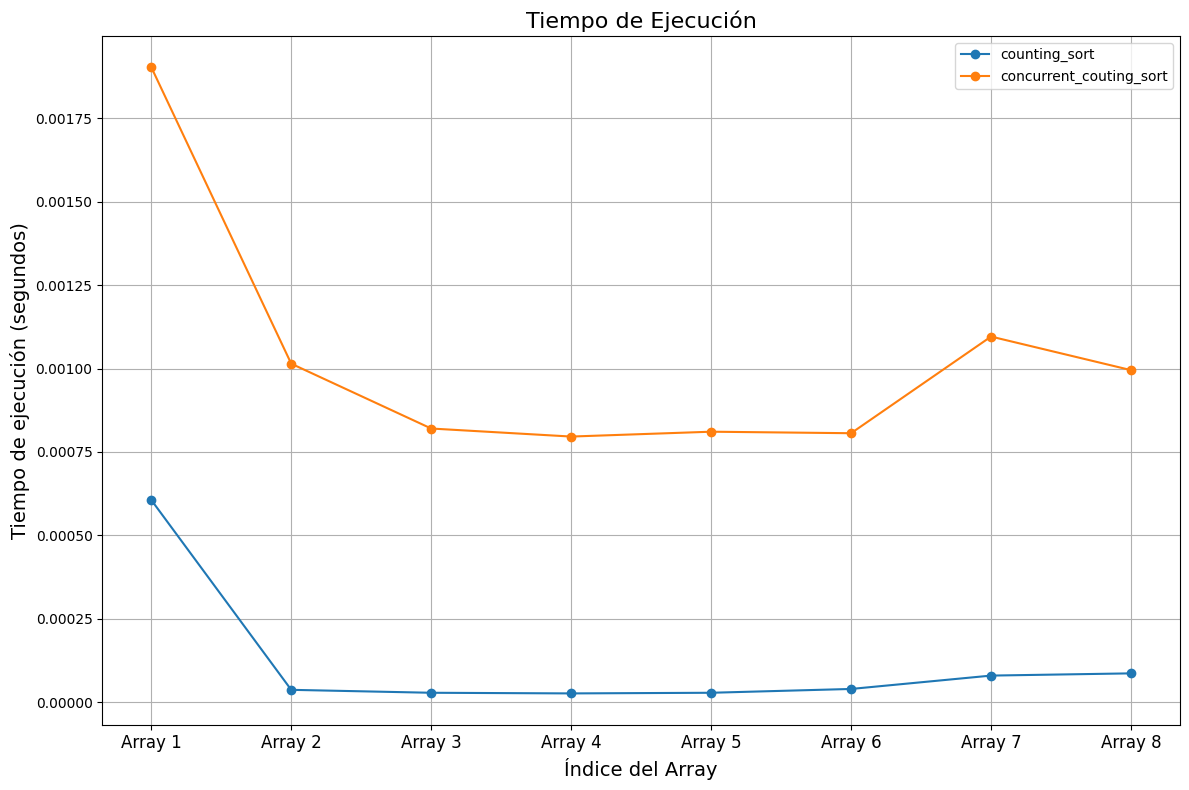

In [2471]:
plot_run_time([counting_sort, concurrent_couting_sort])

### Bubble Sort Secuencial

In [2472]:
def bubble_sort(arr):
    global counter

    n = len(arr)
    # Recorre todo el array
    for i in range(n):
        # Bandera para optimizar
        swapped = False
        # Compara elementos restando 1 por cada ciclo
        for j in range(0, n - i - 1):
            counter += 1  # Incrementa el contador
            if arr[j] > arr[j + 1]:
                # Intercambia si están en el orden incorrecto
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        # Si no se hicieron intercambios, el array ya está ordenado
        if not swapped:
            break

    return counter

### Bubble Sort Concurrent

In [2473]:
import threading

def bubble_sort_partial(arr, start, end):
    global counter

    n = end - start
    for i in range(n):
        swapped = False
        for j in range(start, end - i - 1):
            counter += 1  # Incrementa el contador
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break

def concurrent_bubble_sort(arr):
    n = len(arr)
    if n < 2:
        return arr

    threads = []
    
    # Dividir el trabajo entre 2 hilos
    mid = n // 2
    
    # Crear dos hilos para ordenar las dos mitades
    thread1 = threading.Thread(target=bubble_sort_partial, args=(arr, 0, mid))
    thread2 = threading.Thread(target=bubble_sort_partial, args=(arr, mid, n))
    
    threads.append(thread1)
    threads.append(thread2)

    # Iniciar los hilos
    for thread in threads:
        thread.start()
    
    # Esperar a que ambos hilos terminen
    for thread in threads:
        thread.join()

    # Después de que ambos hilos hayan terminado, hacer un bubble sort para mezclar las partes
    # Esto asegura que el array completo esté ordenado
    bubble_sort_partial(arr, 0, n)  # Ordenar todo el array

    return counter

### Comparación arrays Bobble Sort Secuencial vs Concurrente

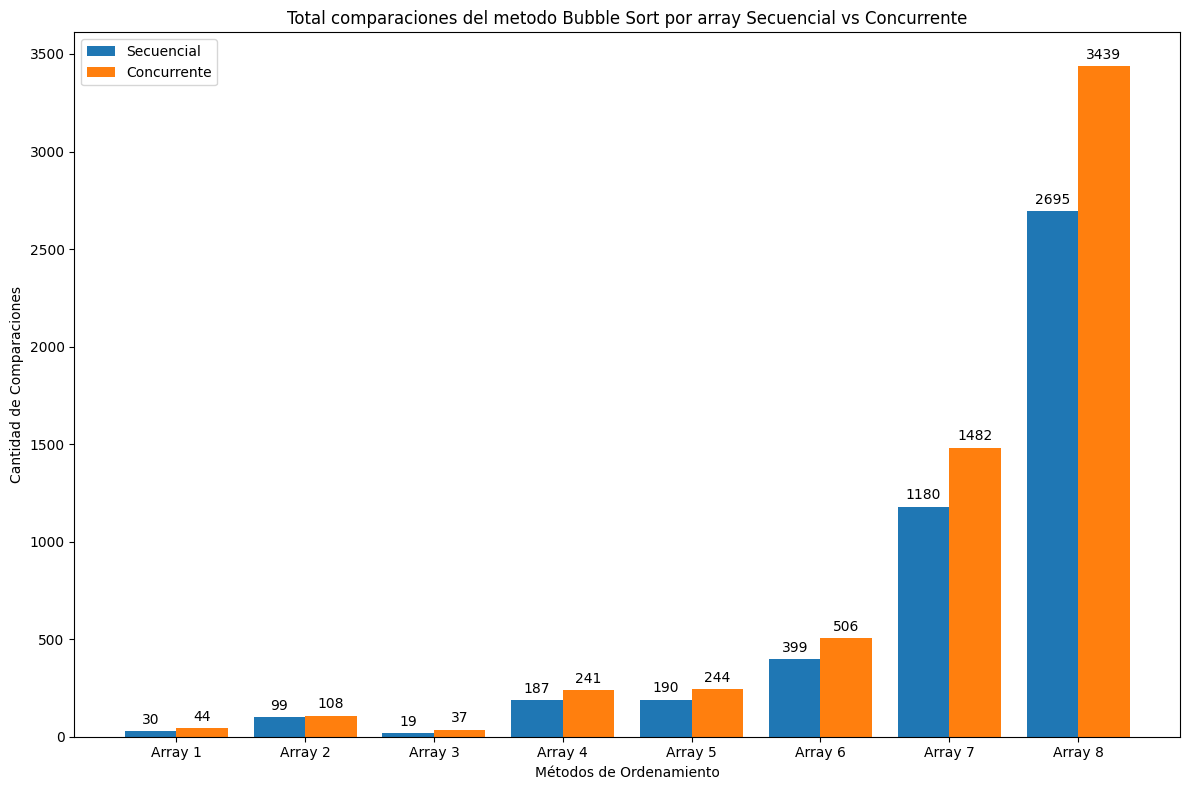

In [2474]:
bubble_sort_sec = get_counting_sort_results(arrays, bubble_sort)
bubble_sort_conc = get_counting_sort_results(arrays, concurrent_bubble_sort)

plot_comparisons_arrays("Total comparaciones del metodo Bubble Sort por array Secuencial vs Concurrente", labels_arrays, [bubble_sort_sec, bubble_sort_conc], ['Secuencial', 'Concurrente'])

### Comparación tiempo de ejecución Bobble Sort Secuencial vs Concurrent

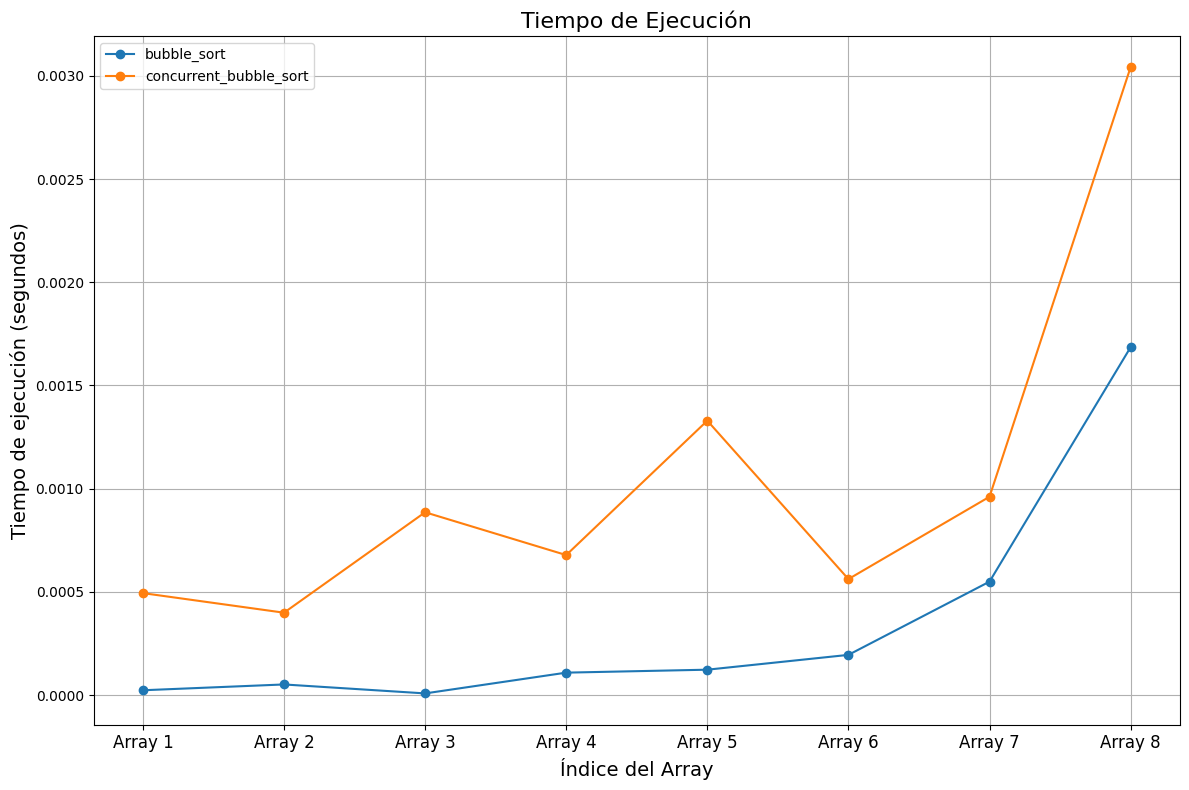

In [2475]:
plot_run_time([bubble_sort, concurrent_bubble_sort])

### Quick Sort Secuencial

In [2476]:
def quick_sort(arr):
    global counter
    counter = 0
    if len(arr) <= 1:
        return counter  # Retorna 0 comparaciones
    else:
        pivot = arr[len(arr) // 2]  # Elegir el pivote
        left = []
        middle = []
        right = []
        
        for x in arr:
            counter += 1  # Incrementar el contador por cada comparación
            if x < pivot:
                left.append(x)
            elif x == pivot:
                middle.append(x)
            else:
                right.append(x)

        # Recursión y sumar comparaciones
        counter += quick_sort(left)
        counter += quick_sort(right)

        return counter  # Retornar solo el contador

### Quick Sort Concurrente

In [2477]:
import threading

lock = threading.Lock()
counter = 0

def concurrent_quick_sort(arr):
    global counter

    def _concurrent_quick_sort(arr):
        global counter  # Usar la variable global counter
        if len(arr) <= 1:
            return arr

        pivot = arr[len(arr) // 2]  # Elegir el pivote
        left = []
        middle = []
        right = []

        for x in arr:
            with lock:  # Asegura que el acceso a counter sea seguro
                counter += 1  # Contar la comparación
            if x < pivot:
                left.append(x)
            elif x == pivot:
                middle.append(x)
            else:
                right.append(x)

        # Usar hilos solo si las listas son suficientemente grandes
        left_sorted = []
        right_sorted = []
        threshold = 500  # Umbral para crear hilos

        if len(left) > threshold or len(right) > threshold:
            # Crear hilos para las particiones
            left_thread = threading.Thread(target=lambda: left_sorted.extend(_concurrent_quick_sort(left)))
            right_thread = threading.Thread(target=lambda: right_sorted.extend(_concurrent_quick_sort(right)))

            left_thread.start()
            right_thread.start()

            left_thread.join()
            right_thread.join()
        else:
            left_sorted = _concurrent_quick_sort(left)
            right_sorted = _concurrent_quick_sort(right)

        return left_sorted + middle + right_sorted

    sorted_array = _concurrent_quick_sort(arr)
    
    return counter

### Comparación arrays Quick Sort Secuencial vs Concurrente

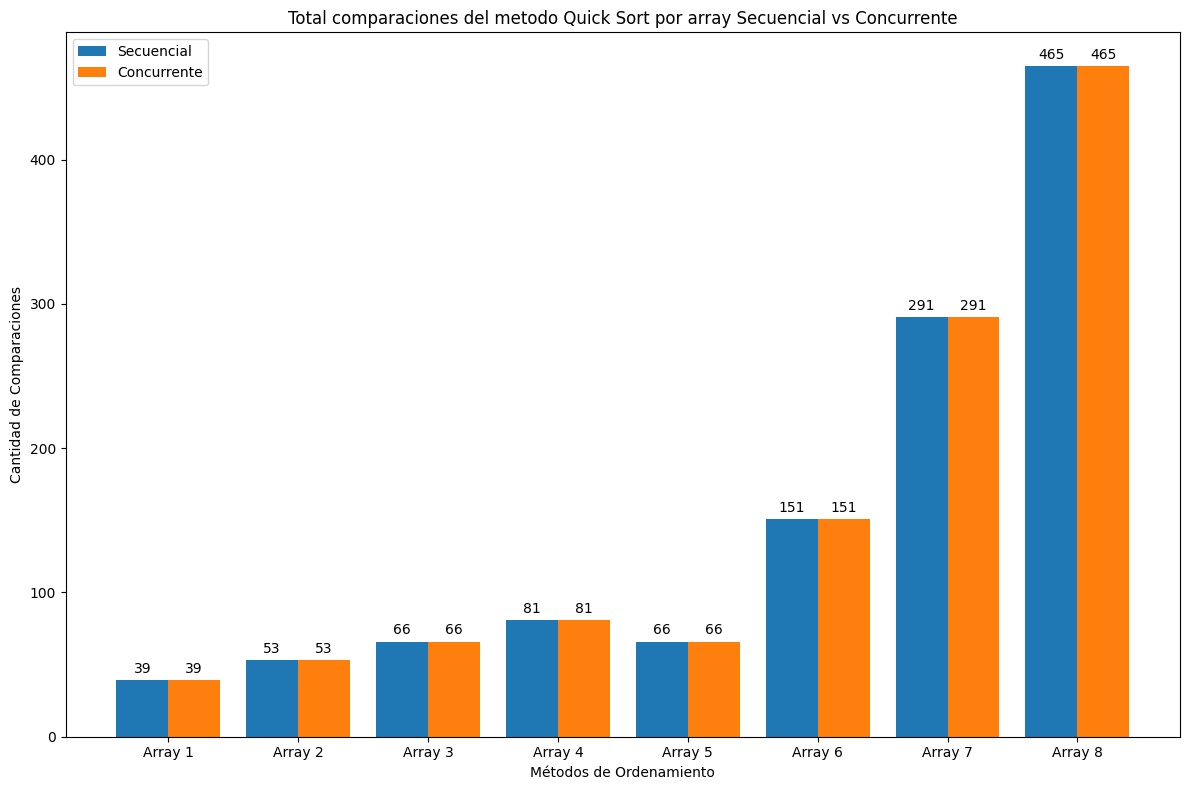

In [2478]:
quick_sort_sec = get_counting_sort_results(arrays, quick_sort)
quick_sort_conc = get_counting_sort_results(arrays, concurrent_quick_sort)


plot_comparisons_arrays("Total comparaciones del metodo Quick Sort por array Secuencial vs Concurrente", labels_arrays, [quick_sort_sec, quick_sort_conc], ['Secuencial', 'Concurrente'])

### Comparación tiempo de ejecución Quick Sort Secuencial vs Concurrent

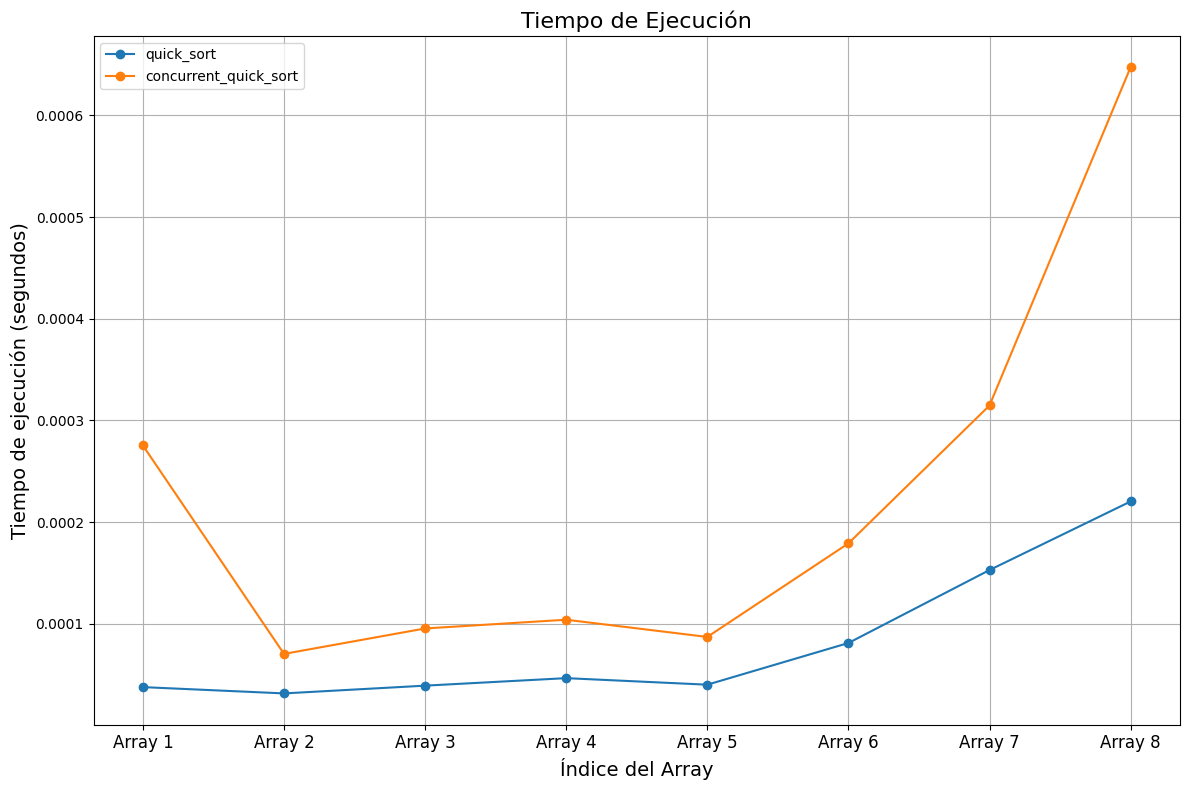

In [2479]:
plot_run_time([quick_sort, concurrent_quick_sort])

### Merge Sort Secuencial

In [2480]:
def merge_sort(arr):
    global counter

    def _merge_sort(arr):
        global counter
        if len(arr) <= 1:
            return arr

        mid = len(arr) // 2  # Encontrar el punto medio
        left = _merge_sort(arr[:mid])  # Ordenar la mitad izquierda
        right = _merge_sort(arr[mid:])  # Ordenar la mitad derecha

        return merge(left, right)

    def merge(left, right):
        global counter
        result = []
        i = j = 0

        while i < len(left) and j < len(right):
            counter += 1  # Contar la comparación
            if left[i] <= right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1

        # Agregar los elementos restantes
        result.extend(left[i:])
        result.extend(right[j:])
        
        return result

    _merge_sort(arr)
    return counter

### Merge Sort Concurrente

In [2481]:
import threading

# Variable global
counter = 0
lock = threading.Lock()  # Para proteger el acceso a counter

def concurrent_merge_sort(arr):
    global counter
    counter = 0  # Reiniciar el contador al inicio de la función

    def _concurrent_merge_sort(arr):
        global counter
        if len(arr) <= 1:
            return arr

        mid = len(arr) // 2  # Encontrar el punto medio
        left = []
        right = []

        # Crear hilos para ordenar las mitades
        left_thread = threading.Thread(target=lambda: left.extend(_concurrent_merge_sort(arr[:mid])))
        right_thread = threading.Thread(target=lambda: right.extend(_concurrent_merge_sort(arr[mid:])))

        left_thread.start()
        right_thread.start()

        # Esperar a que ambos hilos terminen
        left_thread.join()
        right_thread.join()

        return concurrent_merge(left, right)

    def concurrent_merge(left, right):
        global counter
        result = []
        i = j = 0

        while i < len(left) and j < len(right):
            with lock:  # Asegurar acceso seguro al contador
                counter += 1  # Contar la comparación
            if left[i] <= right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1

        # Agregar los elementos restantes
        result.extend(left[i:])
        result.extend(right[j:])
        
        return result

    _concurrent_merge_sort(arr)
    return counter

### Comparación arrays Merge Sort Secuencial vs Concurrente

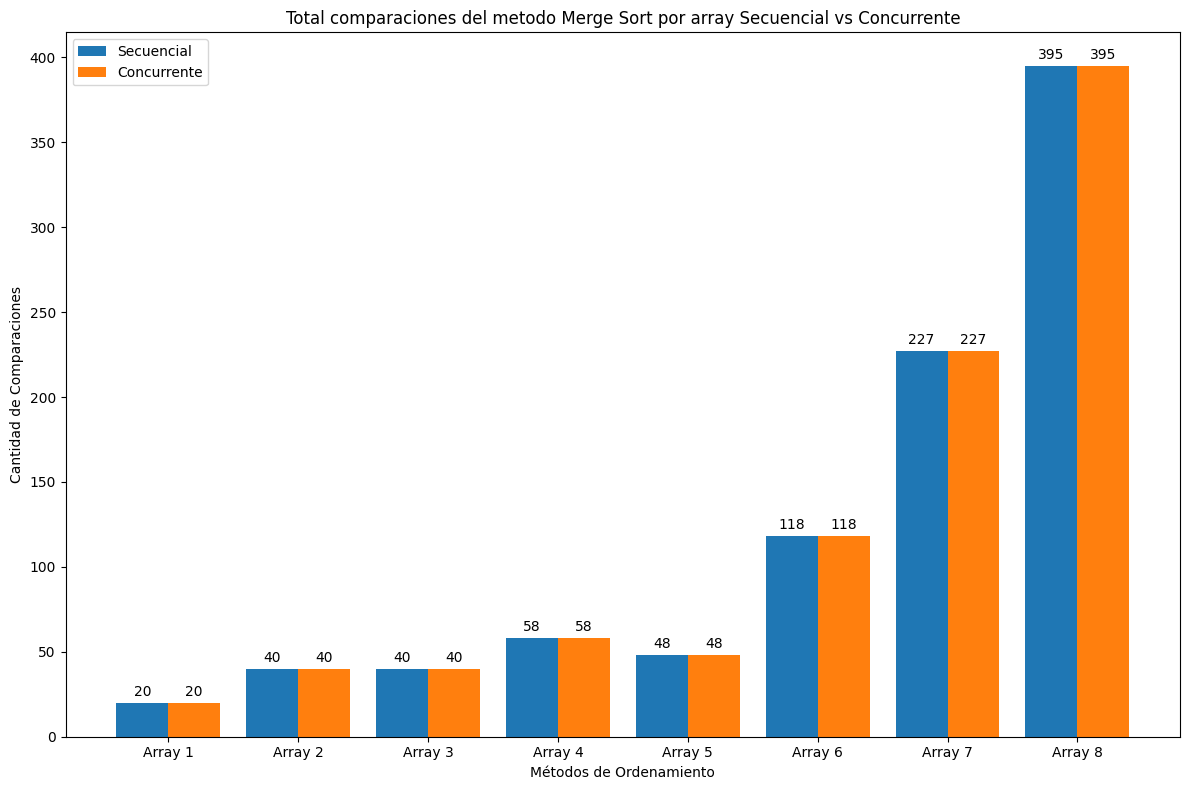

In [2482]:
merge_sort_sec = get_counting_sort_results(arrays, merge_sort)
merge_sort_conc = get_counting_sort_results(arrays, concurrent_merge_sort)


plot_comparisons_arrays("Total comparaciones del metodo Merge Sort por array Secuencial vs Concurrente", labels_arrays, [merge_sort_sec, merge_sort_conc], ['Secuencial', 'Concurrente'])

### Comparación tiempo de ejecución Merge Sort Secuencial vs Concurrent

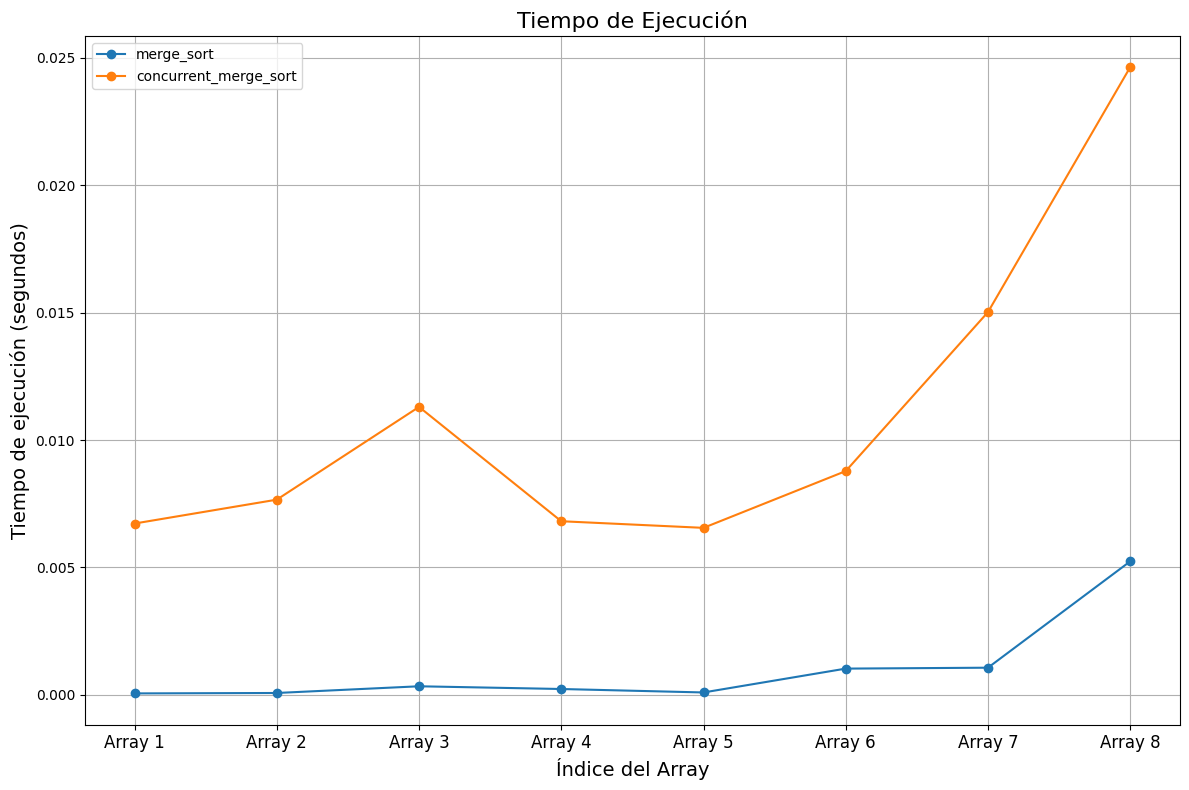

In [2483]:
concurrent_merge_sort
plot_run_time([merge_sort, concurrent_merge_sort])

### Implementamos grafico con el total de comparaciones por array de todos los metodos secuenciales

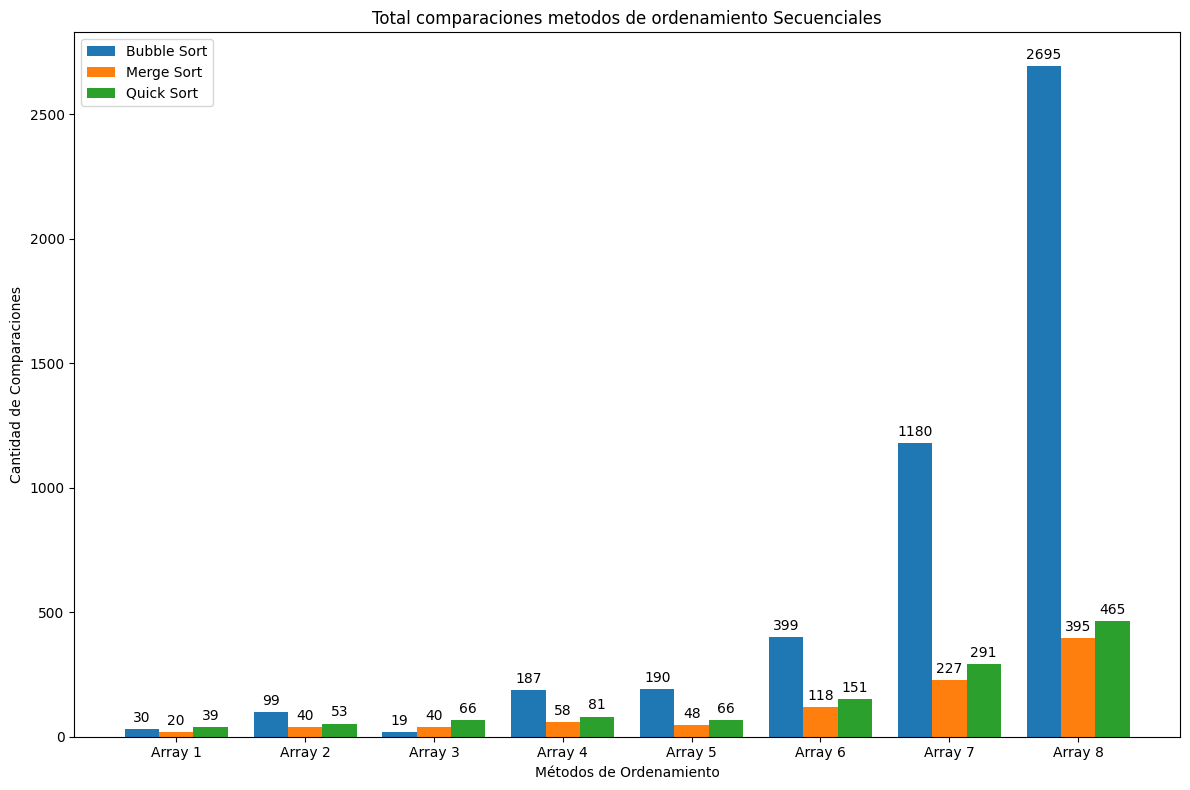

In [2484]:

plot_comparisons_arrays("Total comparaciones metodos de ordenamiento Secuenciales", labels_arrays, [bubble_sort_sec, merge_sort_sec, quick_sort_sec], labels_method)

### Implementamos grafico con el total de comparaciones por array de todos los metodos concurrentes

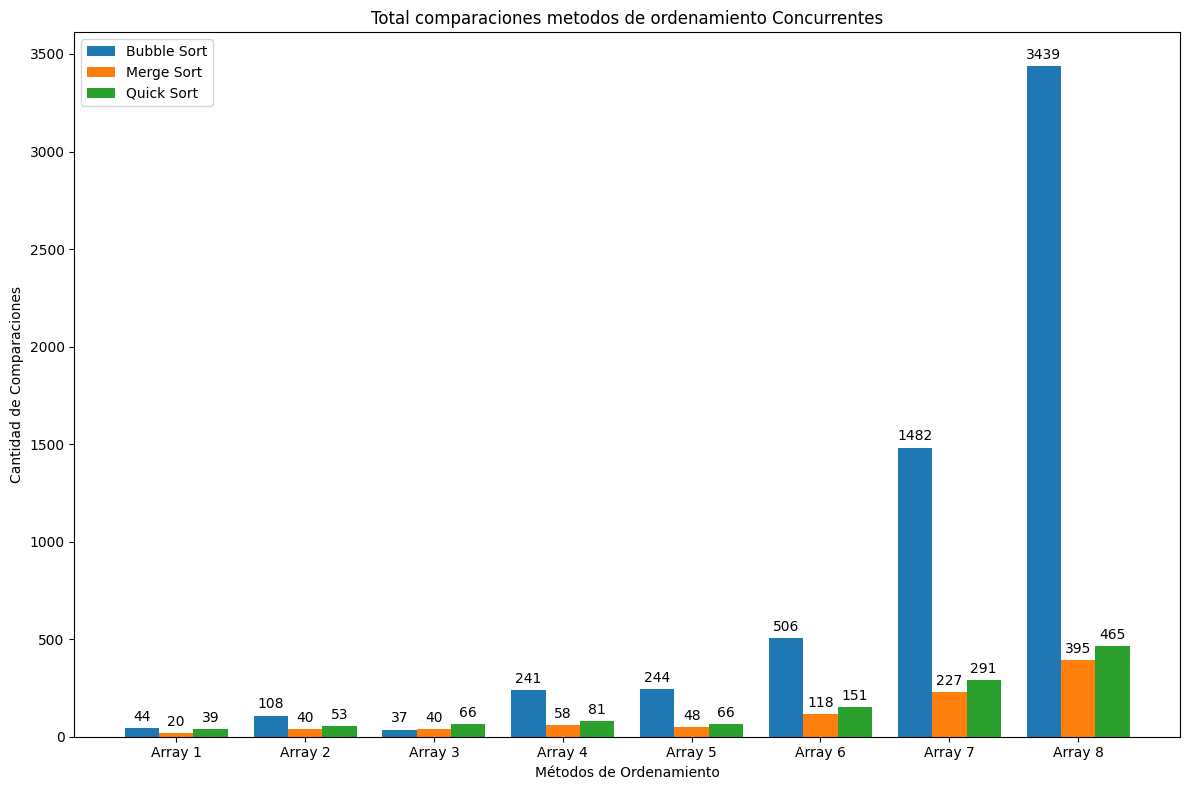

(1, 2, 7, 5, 6)

In [2485]:

plot_comparisons_arrays("Total comparaciones metodos de ordenamiento Concurrentes", labels_arrays, [bubble_sort_conc, merge_sort_conc, quick_sort_conc], labels_method)

1,2,7,5,6

### Comparacion de tiempo de ejecución entre metodos de ordenamiento Secuncial

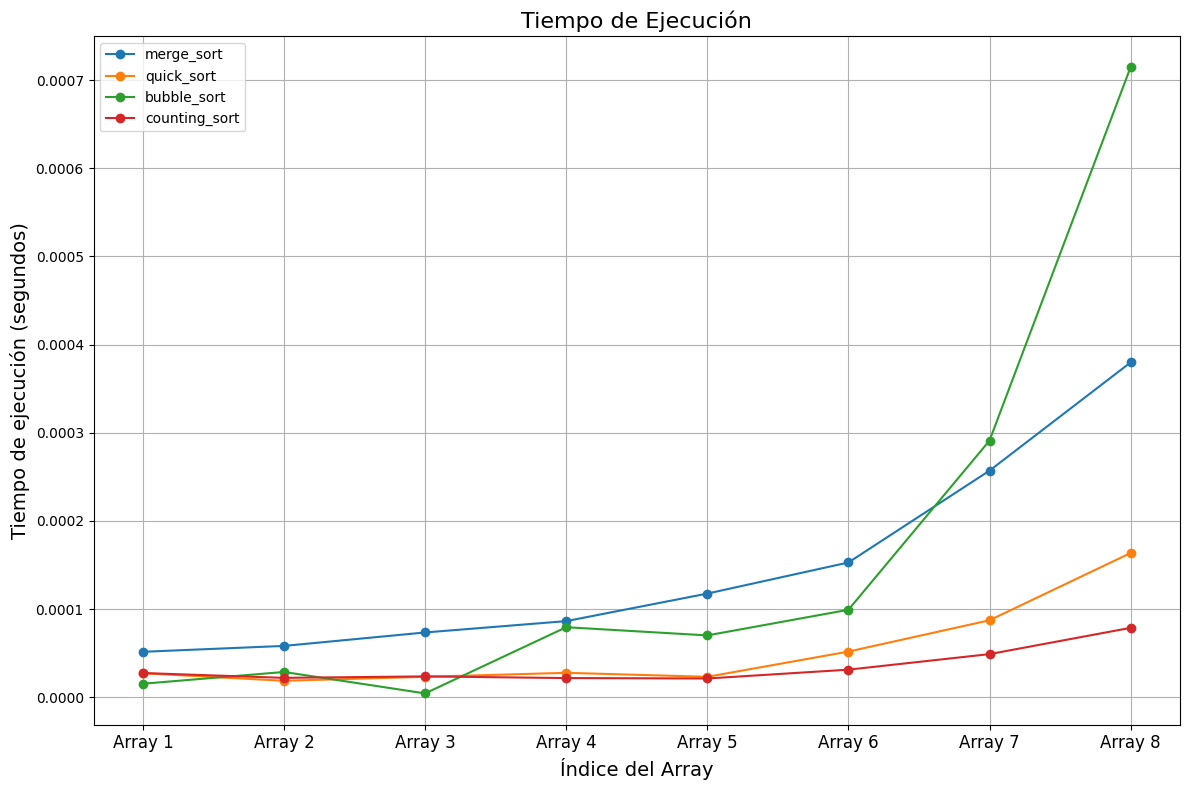

In [2486]:
plot_run_time([merge_sort, quick_sort, bubble_sort, counting_sort])

### Comparacion de tiempo de ejecución entre metodos de ordenamiento Concurrentes

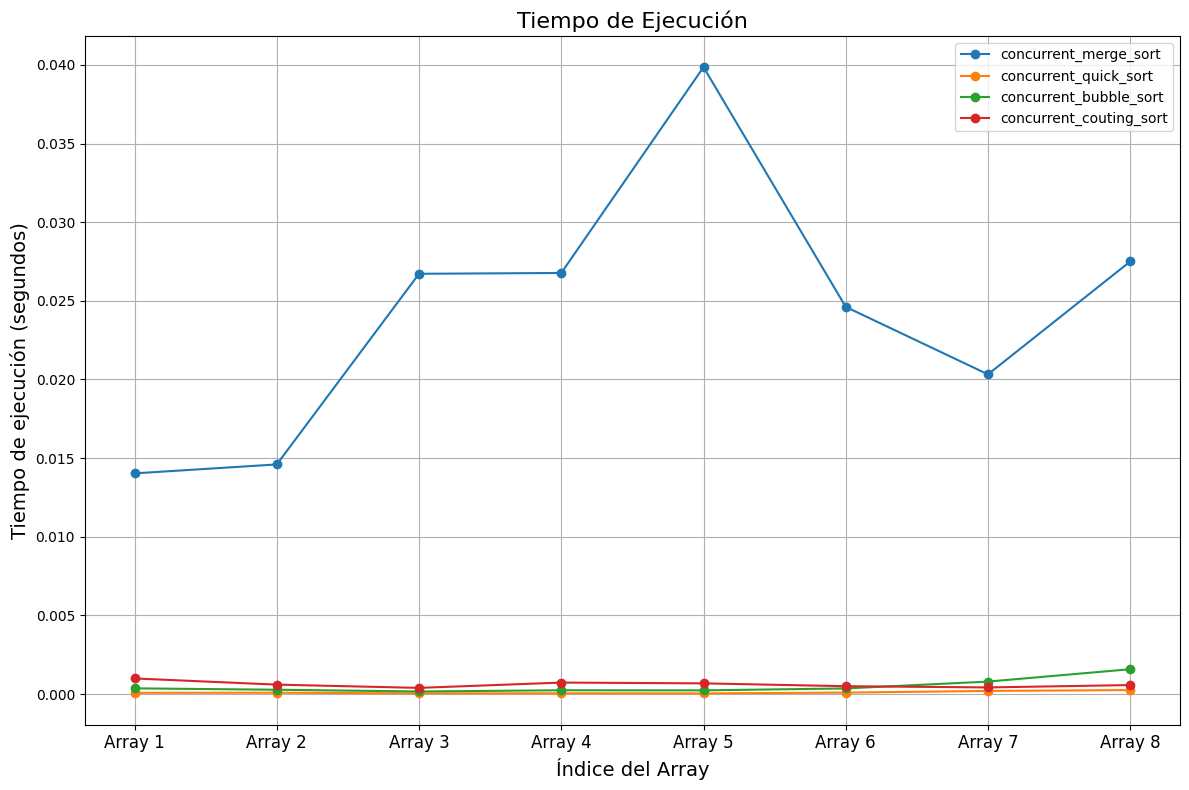

In [2487]:
plot_run_time([concurrent_merge_sort, concurrent_quick_sort, concurrent_bubble_sort, concurrent_couting_sort])

### Comparacion de tiempo de ejecución entre metodos de ordenamiento Concurrentes

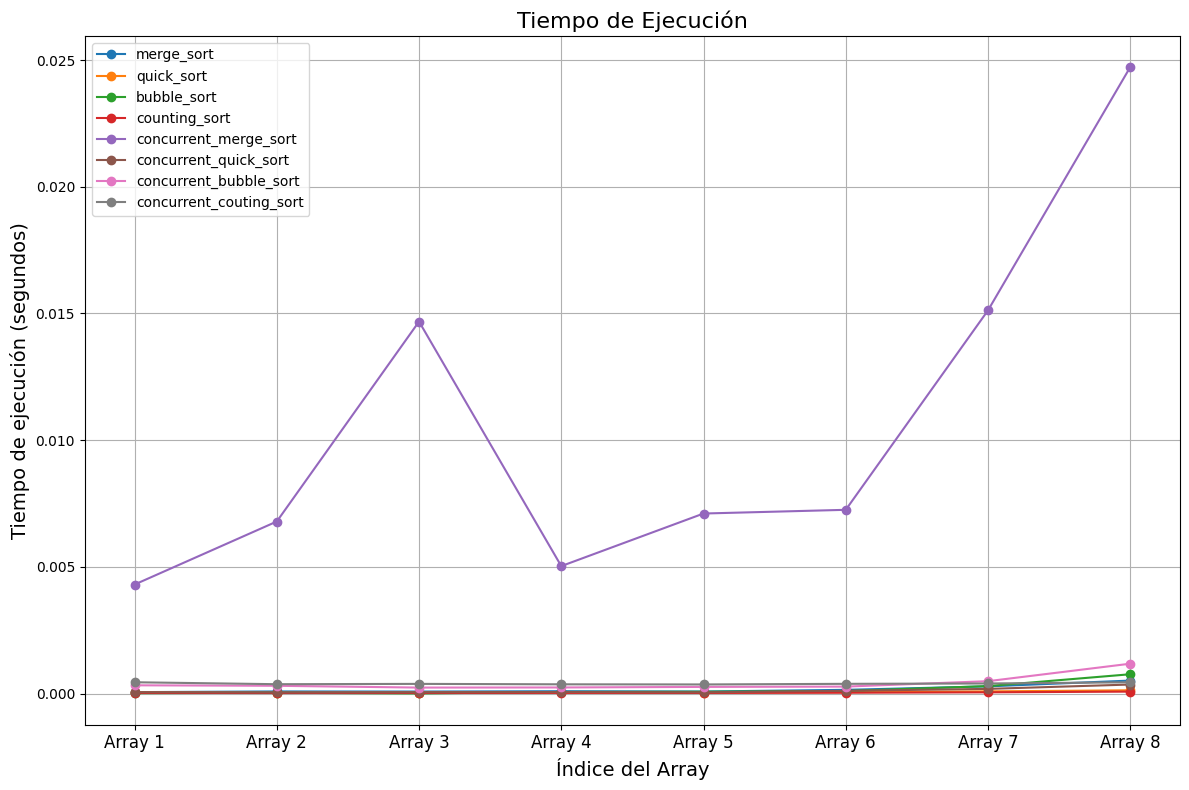

In [2488]:
plot_run_time([merge_sort, quick_sort, bubble_sort, counting_sort, concurrent_merge_sort, concurrent_quick_sort, concurrent_bubble_sort, concurrent_couting_sort])

In [2489]:
def quick_sort(arr):
    if len(arr) <= 1:
        return 0  # Retorna 0 comparaciones
    else:
        pivot = arr[len(arr) // 2]  # Elegir el pivote
        left = []
        middle = []
        right = []
        counter = 0  # Contador de comparaciones
        
        for x in arr:
            counter += 1  # Incrementar el contador por cada comparación
            if x < pivot:
                left.append(x)
            elif x == pivot:
                middle.append(x)
            else:
                right.append(x)

        # Recursión y sumar comparaciones
        counter += quick_sort(left)
        counter += quick_sort(right)

        return counter  # Retornar solo el contador

# Ejemplo de uso
import random

array = [4,12,45,345,123,23,235,235,24536,1,2,4,3,3,3,3,3,3,3]
total_counter = quick_sort(array)

# Para verificar
print("Total de comparaciones realizadas:", total_counter)


Total de comparaciones realizadas: 92
